In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("Iris.csv",index_col='Id')

In [62]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [63]:
df.iloc[0:100 , 4]

Id
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
5          Iris-setosa
            ...       
96     Iris-versicolor
97     Iris-versicolor
98     Iris-versicolor
99     Iris-versicolor
100    Iris-versicolor
Name: Species, Length: 100, dtype: object

In [64]:
y=np.where(df.iloc[0:100 , 4] == 'Iris-setosa',-1,1)

In [65]:
X=df.iloc[0:100,[1,3]]

In [66]:
X.iloc[0:5 , 0]

Id
1    3.5
2    3.0
3    3.2
4    3.1
5    3.6
Name: SepalWidthCm, dtype: float64

In [67]:
import matplotlib.pyplot as plt

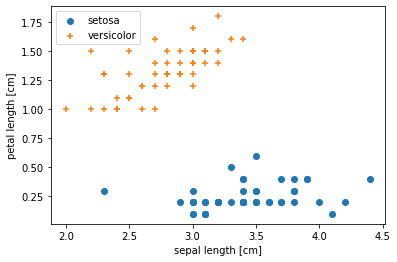

In [68]:
plt.scatter(X.iloc[0:50,0],X.iloc[0:50,1],marker='o',label='setosa')
plt.scatter(X.iloc[50:,0],X.iloc[50:,1],marker='+',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [81]:
import perceptron_algorithm as pa

In [82]:
ppn = pa.Perceptron(eta=0.1, n_iter=10)
#X=X.astype('<U32')

In [83]:
ppn.fit(X.to_numpy(),y)

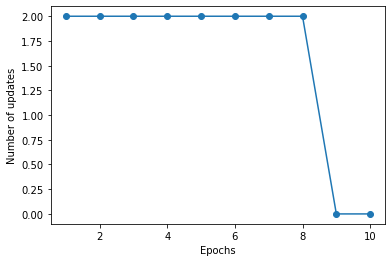

In [85]:
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [90]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
            # setup marker generator and color map
            markers = ('s', 'x', 'o', '^', 'v')
            colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
            cmap = ListedColormap(colors[:len(np.unique(y))])
            # plot the decision surface
            x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
            np.arange(x2_min, x2_max, resolution))
            Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
            Z = Z.reshape(xx1.shape)
            plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
            plt.xlim(xx1.min(), xx1.max())
            plt.ylim(xx2.min(), xx2.max())
            # plot class samples
            for idx, cl in enumerate(np.unique(y)):
                plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
            

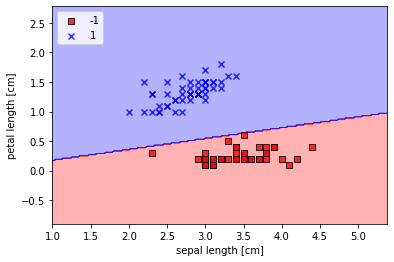

In [93]:
plot_decision_regions(X.to_numpy(), y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()